In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4.2.3 Clustering Methods Comparison

__Goal__

Create 3+ different blobs...more blobs, closer together, farther apart, etc....and run all 4 clustering methods (k-means, mean shift, spectral clustering, and affinity) on them.  Discuss what you learned about the clustering methods based on their relative performance for the different blob configurations.

In [2]:
# Imports

# K-Means
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Mean Shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Spectral Clustering
from sklearn.cluster import SpectralClustering

# Affinity Propagation
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

# General 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

## Blob Overview:

 All blobs consist of 5 blobs:
 
Blob 1 - Far apart, high sd<br>
Blob 2 - Far apart, low sd<br>
Blob 3 - Close together, high sd<br>
Blob 4 - Clost together, low sd

## Blob #1 - 5 blobs, far apart,  higher standard deviation (sd=2)

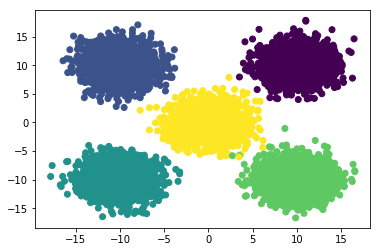

In [3]:
# ****************** BLOB 1 *********************
# 5 blobs, far apart, high standard dev (sd=2)

# Specify centers
centers = [[10, 10], [-10, 10], [-10, -10], [10, -10], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data (only function here to make training set smaller?)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)

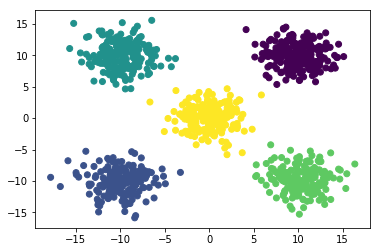

K-Means, Blob 1:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0    0  191    0    0
2        0  203    0    0    0
3        0    0    0  187    0
4        0    0    0    0  198


In [4]:
# ************** B1: K-Means ******************

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means, Blob 1:')
print(pd.crosstab(Y_, y_train))

In [5]:
# *************** B1: Mean Shift ****************
# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  5


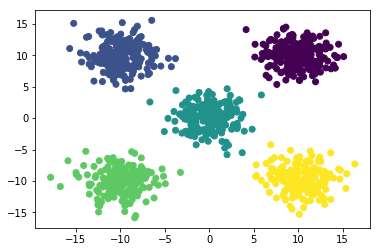

Mean Shift, Blob 1:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0  203    0    0    0
2        0    0    0    0  198
3        0    0  191    0    0
4        0    0    0  187    0


In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift, Blob 1:')
print(pd.crosstab(labels, y_train))

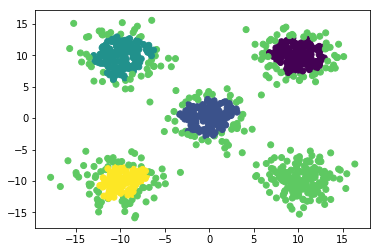

Spectral Clustering, Blob 1
col_0    0    1    2    3    4
row_0                         
0      157    0    0   64    0
1        0    0  155   48    0
2        0    0    0   68  123
3        0    0    0  187    0
4        0  148    0   50    0


In [7]:
# ************** B1: Spectral Clustering **************

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering, Blob 1')
print(pd.crosstab(y_train, predict))

In [8]:
# ************* B1: Affinity Propagation **************

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 15


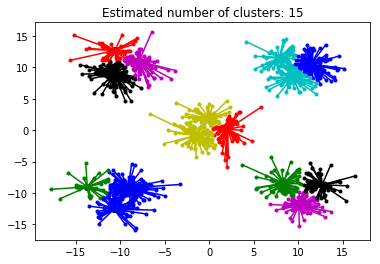

In [9]:
plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Blob 1 Recap
Blob #1 classified by 5 blobs, with centroids spread far apart and high standard deviation (sd=3).

__K-Means__: Performed well

__Mean-Shift__: Performed well

__Spectral Clustering__: Performed poorly; data far from each centroid grouped into one cluster.

__Affinity Propagation__: Performed poorly; identified 15 clusters

## Blob #2 - 5 blobs, far apart, low standard deviation (sd=1)

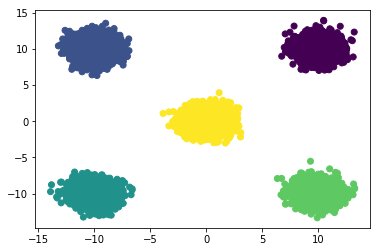

In [10]:
# ****************** BLOB 2 *********************
# 5 blobs, far apart, low standard dev (sd=1)

# Specify centers
centers = [[10, 10], [-10, 10], [-10, -10], [10, -10], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data (only function here to make training set smaller?)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)

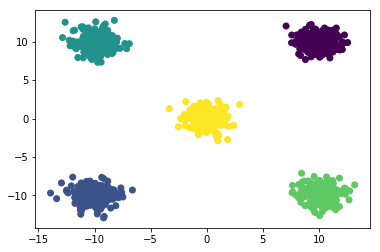

K-Means, Blob 2:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0    0  191    0    0
2        0  203    0    0    0
3        0    0    0  187    0
4        0    0    0    0  198


In [11]:
# ************** B2: K-Means ******************

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means, Blob 2:')
print(pd.crosstab(Y_, y_train))

In [12]:
# *************** B2: Mean Shift ****************

# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  5


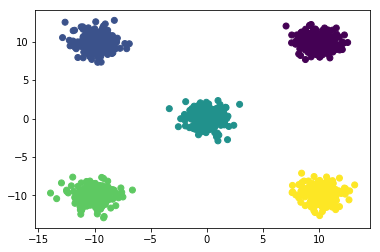

Mean Shift, Blob 2:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0  203    0    0    0
2        0    0    0    0  198
3        0    0  191    0    0
4        0    0    0  187    0


In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift, Blob 2:')
print(pd.crosstab(labels, y_train))

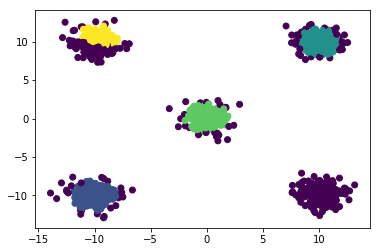

Spectral Clustering, Blob 2
col_0    0    1    2    3    4
row_0                         
0       35    0  186    0    0
1      103    0    0    0  100
2       25  166    0    0    0
3      187    0    0    0    0
4       24    0    0  174    0


In [14]:
# ************** B2: Spectral Clustering **************

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering, Blob 2')
print(pd.crosstab(y_train, predict))

In [15]:
# ************* B2: Affinity Propagation **************

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 579


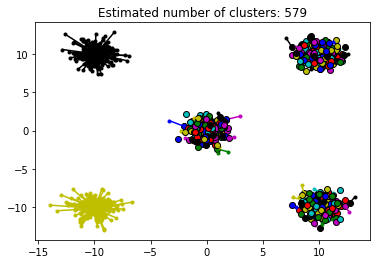

In [16]:
plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Blob 2 Recap
Blob #2 classified by 5 blobs, with centroids spread far apart and low standard deviation (sd=1).

__K-Means__: Performed perfectly

__Mean-Shift__: Performed perfectly

__Spectral Clustering__: Performed poorly; data far from each centroid grouped into one cluster.  Same behavior as high standard deviation data.

__Affinity Propagation__: Performed very poorly; identified 579 clusters

## Blob #3 - 5 blobs, close centroids, high standard deviation.  Similar to blob 1 but closer centroids

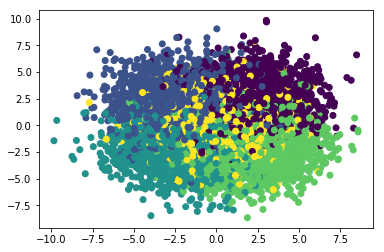

In [17]:
# ****************** BLOB 3 *********************
# 5 blobs, close together, high standard dev (sd=2)

# Specify centers
centers = [[2, 2], [-2, 2], [-2, -2], [2, -2], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data (only function here to make training set smaller?)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)

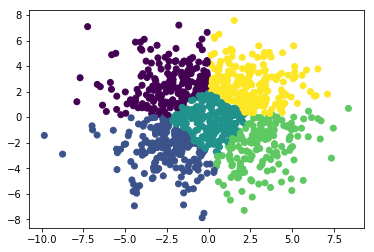

K-Means, Blob 3:
col_0    0    1    2    3   4
row_0                        
0       22  123   16    3  32
1        3   23  124    9  24
2       32   34   39   39  88
3       18    1   12  117  18
4      146   22    0   19  36


In [18]:
# ************** B3: K-Means ******************

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means, Blob 3:')
print(pd.crosstab(Y_, y_train))

In [19]:
# *************** B3: Mean Shift ****************

# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  1


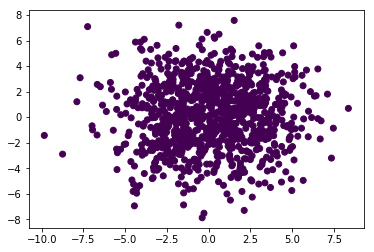

Mean Shift, Blob 3:
col_0    0    1    2    3    4
row_0                         
0      221  203  191  187  198


In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift, Blob 3:')
print(pd.crosstab(labels, y_train))

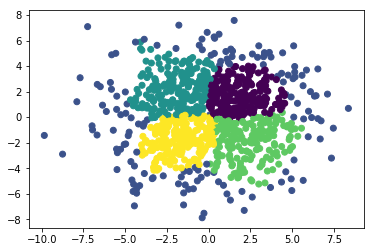

Spectral Clustering, Blob 3
col_0    0   1    2    3    4
row_0                        
0      117  46   27   24    7
1       23  25  122    4   29
2        2  47   15   20  107
3       23  21    5  114   24
4       60  10   48   29   51


In [21]:
# ************** B3: Spectral Clustering **************

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering, Blob 3')
print(pd.crosstab(y_train, predict))

In [22]:
# ************* B3: Affinity Propagation **************

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 91


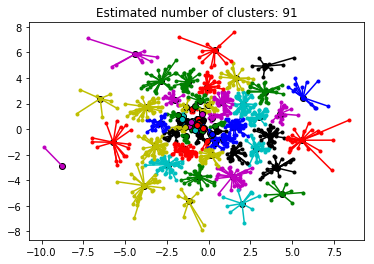

In [23]:
plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Blob 3 Recap
Blob #3 classified by 5 blobs, with centroids close together and higher standard deviation (sd=2).

__K-Means__: Performed decently.  Accurately identified centroids but overall accuracy not great.

__Mean-Shift__: Performed poorly.  Only 1 cluster identified.

__Spectral Clustering__: Performed poorly.  Inaccurate clusters identified. Data on outer edge of blobs grouped together.

__Affinity Propagation__: Performed very poorly; identified 91 clusters.

## Blob #4 - 5 blobs, close centroids, high standard deviation.  Similar to blob 2 but closer centroids

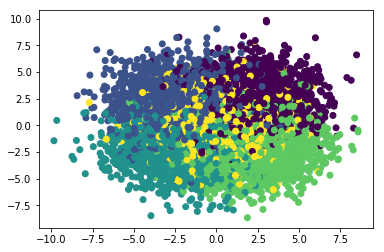

In [24]:
# ****************** BLOB 4 *********************
# 5 blobs, close together, high standard dev (sd=2)

# Specify centers
centers = [[2, 2], [-2, 2], [-2, -2], [2, -2], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data (only function here to make training set smaller?)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)

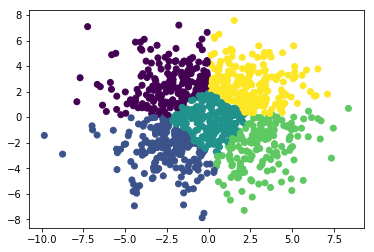

K-Means, Blob 4:
col_0    0    1    2    3   4
row_0                        
0       22  123   16    3  32
1        3   23  124    9  24
2       32   34   39   39  88
3       18    1   12  117  18
4      146   22    0   19  36


In [25]:
# ************** B4: K-Means ******************

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means, Blob 4:')
print(pd.crosstab(Y_, y_train))

In [26]:
# *************** B4: Mean Shift ****************

# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  1


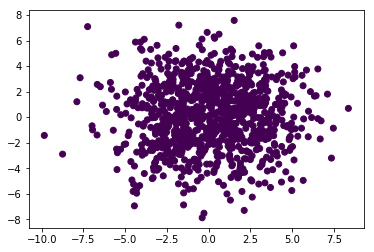

Mean Shift, Blob 4:
col_0    0    1    2    3    4
row_0                         
0      221  203  191  187  198


In [27]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift, Blob 4:')
print(pd.crosstab(labels, y_train))

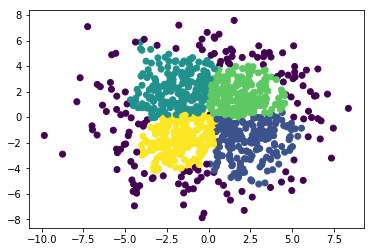

Spectral Clustering, Blob 4
col_0   0    1    2    3    4
row_0                        
0      46   24   27  117    7
1      25    4  122   23   29
2      47   20   15    2  107
3      21  114    5   23   24
4      10   29   48   60   51


In [28]:
# ************** B4: Spectral Clustering **************

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering, Blob 4')
print(pd.crosstab(y_train, predict))

In [29]:
# ************* B4: Affinity Propagation **************

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 91


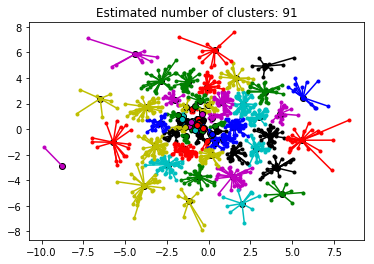

In [30]:
plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Blob 4 Recap
Blob #4 classified by 5 blobs, with centroids close together and lower standard deviation (sd=1).

__K-Means__: Performed ok.  Accurately identified centroids but overall accuracy not great.  Center most centroid lost a lot of data to other clusters.

__Mean-Shift__: Performed poorly.  Only 1 cluster identified.

__Spectral Clustering__: Performed poorly.  Inaccurate clusters identified. Data on outer edge of blobs grouped together.  Similar to 3.

__Affinity Propagation__: Performed very poorly; identified 91 clusters.  Same as blob 3.

## Overall Takeaways:
* K-means performs well if you know how many clusters you have.  Accuracy decreases the closer clusters are to each other.
* Mean-Shift performance varies.  Performs better if cluster centroids are further away from each other (i.e. more distinct clusters)
* Spectral clustering performed poorly in all iterations of the blobs.  Non-flat geometry of algorithm groups outliers from all clusters into one.
* Affinity propagation identified far too many clusters in all scenarios.  Performed best with high standard deviation and far-spaced clusters.